<a href="https://colab.research.google.com/github/VardanDavtyan/ML-DL/blob/main/IrisDataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

import tensorflow  as tf
from tensorflow import keras
from keras.models import Sequential, Model
from keras.layers import Input, Dense, Embedding, Flatten, Dropout, BatchNormalization, concatenate
from keras.optimizers import Adam

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor

from sklearn import datasets

In [ ]:
iris = datasets.load_iris()
data = iris.data
value = keras.utils.to_categorical(iris.target, num_classes=3)
X_train, X_test, y_train, y_test = train_test_split(data, value, test_size=0.2)

model = Sequential()
model.add(Dense(1000,input_dim=4,activation='relu'))
model.add(Dense(500,activation='relu'))
model.add(Dense(300,activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(3,activation='softmax'))
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1000)              5000      
                                                                 
 dense_1 (Dense)             (None, 500)               500500    
                                                                 
 dense_2 (Dense)             (None, 300)               150300    
                                                                 
 dropout (Dropout)           (None, 300)               0         
                                                                 
 dense_3 (Dense)             (None, 3)                 903       
                                                                 
Total params: 656703 (2.51 MB)
Trainable params: 656703 (2.51 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
history = model.fit(X_train, y_train, batch_size=32, epochs=50, validation_split=0.2)

Epoch 1/50
3/3 [==============================] - 2s 179ms/step - loss: 1.0181 - accuracy: 0.4792 - val_loss: 0.6167 - val_accuracy: 0.8750
Epoch 2/50
3/3 [==============================] - 0s 27ms/step - loss: 0.7381 - accuracy: 0.6250 - val_loss: 0.5704 - val_accuracy: 0.5417
Epoch 3/50
3/3 [==============================] - 0s 33ms/step - loss: 0.5424 - accuracy: 0.7500 - val_loss: 0.3557 - val_accuracy: 1.0000
Epoch 4/50
3/3 [==============================] - 0s 35ms/step - loss: 0.4364 - accuracy: 0.8333 - val_loss: 0.3123 - val_accuracy: 1.0000
Epoch 5/50
3/3 [==============================] - 0s 24ms/step - loss: 0.3762 - accuracy: 0.8333 - val_loss: 0.2672 - val_accuracy: 1.0000
Epoch 6/50
3/3 [==============================] - 0s 32ms/step - loss: 0.3236 - accuracy: 0.9062 - val_loss: 0.1755 - val_accuracy: 1.0000
Epoch 7/50
3/3 [==============================] - 0s 25ms/step - loss: 0.2772 - accuracy: 0.9479 - val_loss: 0.1818 - val_accuracy: 1.0000
Epoch 8/50
3/3 [==========

In [ ]:
y_pred = model.predict(X_test)
results = model.evaluate(X_test, y_test)
results

1/1 [==============================] - 0s 29ms/step - loss: 0.0252 - accuracy: 1.0000


[0.02517094276845455, 1.0]

In [ ]:
i = 21;
data = np.array([X_test[i]])
value = model.predict(data)
print("Loss: " + str(((y_test[i]-value)**2).mean()))
print(f"Predicted:{iris.target_names[np.where(np.round(value) == 1)[-1]]}, Actual: {iris.target_names[np.where(y_test[i] == 1)[0]]}")

1/1 [==============================] - 0s 31ms/step
Loss: 1.8359609e-06
Predicted:['virginica'], Actual: ['virginica']


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import PolynomialFeatures
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, AdaBoostClassifier
from sklearn.svm import SVC

iris = datasets.load_iris()
data = iris.data
value = iris.target
X_train, X_test, y_train, y_test = train_test_split(data, value, test_size=0.2)

# Create a logistic regression model
clf = BaggingClassifier(estimator=KNeighborsClassifier(5), n_estimators=10, random_state=0)

# Train the model
clf.fit(X_train, y_train)

# Predict on test data
y_pred = clf.predict(X_test)

# Check accuracy
mse = np.square(np.subtract(y_test, y_pred)).mean()
print(f"Loss: {mse:.2f}")
print(y_pred, y_test)
clf.score(X_test, y_test)

Loss: 0.07
[0 0 0 0 1 2 1 0 2 2 2 1 1 1 1 2 1 0 2 0 0 1 2 1 0 2 0 0 0 0] [0 0 0 0 1 2 1 0 2 2 2 1 1 1 2 2 1 0 2 0 0 1 2 1 0 1 0 0 0 0]


0.9333333333333333

In [ ]:
from sklearn.model_selection import cross_val_score
cross_val_score(clf, X_test, y_test, cv=5)

array([1.        , 1.        , 1.        , 0.83333333, 0.83333333])

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import PolynomialFeatures

iris = datasets.load_iris()
data = iris.data
value = iris.target
X_train, X_test, y_train, y_test = train_test_split(data, value, test_size=0.2)

# Create a logistic regression model
clf = GaussianNB()

# Train the model
clf.fit(X_train, y_train)

# Predict on test data
y_pred = clf.predict(X_test)

# Check accuracy
mse = np.square(np.subtract(y_test, y_pred)).mean()
print(f"Loss: {mse:.2f}")

Loss: 0.00


In [ ]:
import numpy as np
from sklearn.utils import resample

# Sample data
data = np.array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0])

# Number of bootstrap samples to create
n_iterations = 1000

# Size of a bootstrap sample
n_size = 3

# Run bootstrap
bootstrap_means = []

for i in range(n_iterations):
    bootstrap_sample = resample(data, n_samples=n_size)
    print(bootstrap_sample)
    bootstrap_mean = np.mean(bootstrap_sample)
    bootstrap_means.append(bootstrap_mean)

# Confidence intervals
alpha = 0.95
p = ((1.0 - alpha) / 2.0) * 100
lower = np.percentile(bootstrap_means, p)
p = (alpha + ((1.0 - alpha) / 2.0)) * 100
upper = np.percentile(bootstrap_means, p)

print(f"{alpha*100:.1f} confidence interval of the mean: {lower:.3f}, {upper:.3f}")

[0.6 0.4 1. ]
[0.6 0.1 0.1]
[0.5 0.7 0.3]
[0.3 0.2 0.8]
[0.9 0.1 0.4]
[0.6 0.1 0.8]
[0.3 0.7 0.8]
[0.2 0.3 0.4]
[0.1 0.9 0.6]
[0.5 0.8 0.3]
[0.5 0.3 0.2]
[0.1 0.9 0.1]
[0.4 0.3 1. ]
[0.2 0.4 0.3]
[0.3 0.4 0.7]
[0.3 0.4 0.7]
[0.5 0.5 0.8]
[0.6 0.7 0.4]
[0.1 0.9 0.9]
[0.2 0.7 0.5]
[0.4 0.2 0.8]
[1.  0.2 0.6]
[0.3 0.6 0.2]
[0.2 0.6 0.2]
[0.7 0.4 1. ]
[0.4 1.  0.4]
[0.3 0.1 0.7]
[0.7 0.9 0.8]
[0.1 0.5 0.9]
[0.3 0.3 0.5]
[0.2 0.5 0.9]
[0.8 0.4 0.6]
[0.9 0.6 0.1]
[0.6 0.9 0.4]
[0.1 0.7 0.6]
[1.  0.4 0.4]
[0.7 1.  0.9]
[0.9 0.9 0.1]
[0.6 0.6 0.9]
[1.  1.  0.1]
[0.6 0.9 0.3]
[0.7 0.7 0.4]
[1.  0.7 1. ]
[0.7 0.7 0.8]
[0.5 0.1 0.5]
[0.4 0.8 0.6]
[0.2 0.1 0.1]
[0.8 1.  0.7]
[0.9 0.1 0.6]
[0.5 0.7 0.6]
[0.4 0.6 0.4]
[0.3 0.1 0.3]
[0.7 0.3 0.4]
[0.6 0.6 0.4]
[0.6 1.  0.3]
[1.  0.1 0.8]
[0.5 0.8 0.5]
[0.6 0.7 0.8]
[0.1 0.5 1. ]
[0.8 0.1 1. ]
[0.3 0.2 0.7]
[0.5 0.3 0.5]
[1.  1.  0.2]
[0.3 0.4 0.1]
[0.4 0.7 0.9]
[1.  0.1 0.4]
[0.4 0.5 0.9]
[1.  0.2 0.6]
[0.9 0.4 0.9]
[0.5 0.2 0.8]
[0.7 0.3 0.8]
[0.9 0

Data shape: (1797, 64)
Target shape: (1797,)


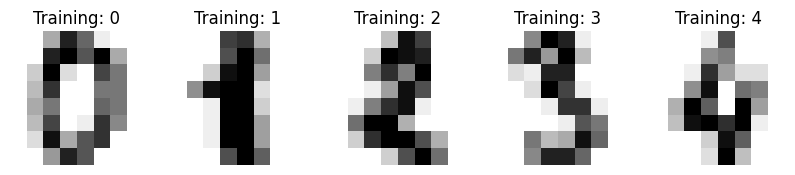

In [ ]:
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits

# Load the digits dataset
digits = load_digits()

# Print the details of the dataset
print("Data shape:", digits.data.shape)
print("Target shape:", digits.target.shape)

# Visualize the first few images and their labels
_, axes = plt.subplots(nrows=1, ncols=5, figsize=(10, 3))
for ax, image, label in zip(axes, digits.images, digits.target):
    ax.set_axis_off()
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    ax.set_title('Training: %i' % label)

plt.show()